In [1]:
import psycopg2
conn = psycopg2.connect('postgresql://brosra01:@localhost/world')
cur = conn.cursor()
cur.execute('select * from country limit 10')
res = cur.fetchall()
#for row in res[:5]:
    #print(row)
    

In [2]:
import csv
import psycopg2
conn = psycopg2.connect('postgresql://brosra01:@localhost/world')
cur = conn.cursor()
x = 'USA'
cur.execute("select code, name, region, continent from country where code = '%s'" % x)
res = cur.fetchall()
#for row in res:
 #   print(row)

    
        

In [3]:
import csv
import psycopg2

with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db =[]
    for row in csv_iter:
        #db.append(row)
        
        
db[:5]

IndentationError: expected an indented block (<ipython-input-3-eb59e49466ea>, line 11)

In [ ]:
'''import csv
import psycopg2
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        
unknown_country = []
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'],
                   'DDR': ['East Germany', 'Europe', 'Western Europe'],
                   'EU': ['European Union', 'Europe', 'Western Europe'],
                   'MNE': ['Montenegro', 'Europe', 'Eastern Europe'],
                   'ROU': ['Romania', 'Europe', 'Eastern Europe'],
                   'SSD': ['South Sudan', 'Africa', 'Northern Africa'],
                   'TLS': ['East Timor', 'Asia', 'Southeast Asia'],
                   'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:
    cur.execute("select code, name, region, continent from country where code = %s", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])
        row.append(country[2])
        row.append(country[3])
        
    else:
        print("No Entry for {}".format(row[2]))
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])
        row.append(other_countries[row[2]][2])
        row.append(other_countries[row[2]][1])


In [ ]:
#for yr in sorted(years):
 #   for region in sorted(years[yr]):
  #      print(yr, region, years[yr][region])

In [ ]:
'''years = {}
for row in db[1:]:
    yr = row[1]
    country = row[2]
    if country not in unknown_country:
        region = row[5]
        if yr not in years:
            years[yr] = {}
        if region not in years[yr]:
            years[yr][region] = 1
        else:
            years[yr][region] += 1'''

In [ ]:
'''for yr in sorted(years):
    for region in sorted(years[yr]):
        print(yr, region, years[yr][region])

In [12]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        

    country_names = {}
    for line in db[1:]:
        country_names[line[4]] = 0
        
        
    
    matrix = {}
    for row in db[1:]:
        spkr = row[4]
        text = row[3]
        if spkr not in matrix:
            matrix[spkr] = country_names.copy()
            
            
        
        for key in matrix:
            counter = text.count(key)
            matrix[spkr][key] += counter

        
                
                



            


                    
                    
        


  

    


In [13]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [14]:
g = nx.Graph()

In [15]:
g.add_nodes_from(matrix) 
for key in matrix: 
    for key2 in matrix[key]: 
        if matrix[key][key2] > 50:
            g.add_edge(key, key2, weight=matrix[key][key2]) 


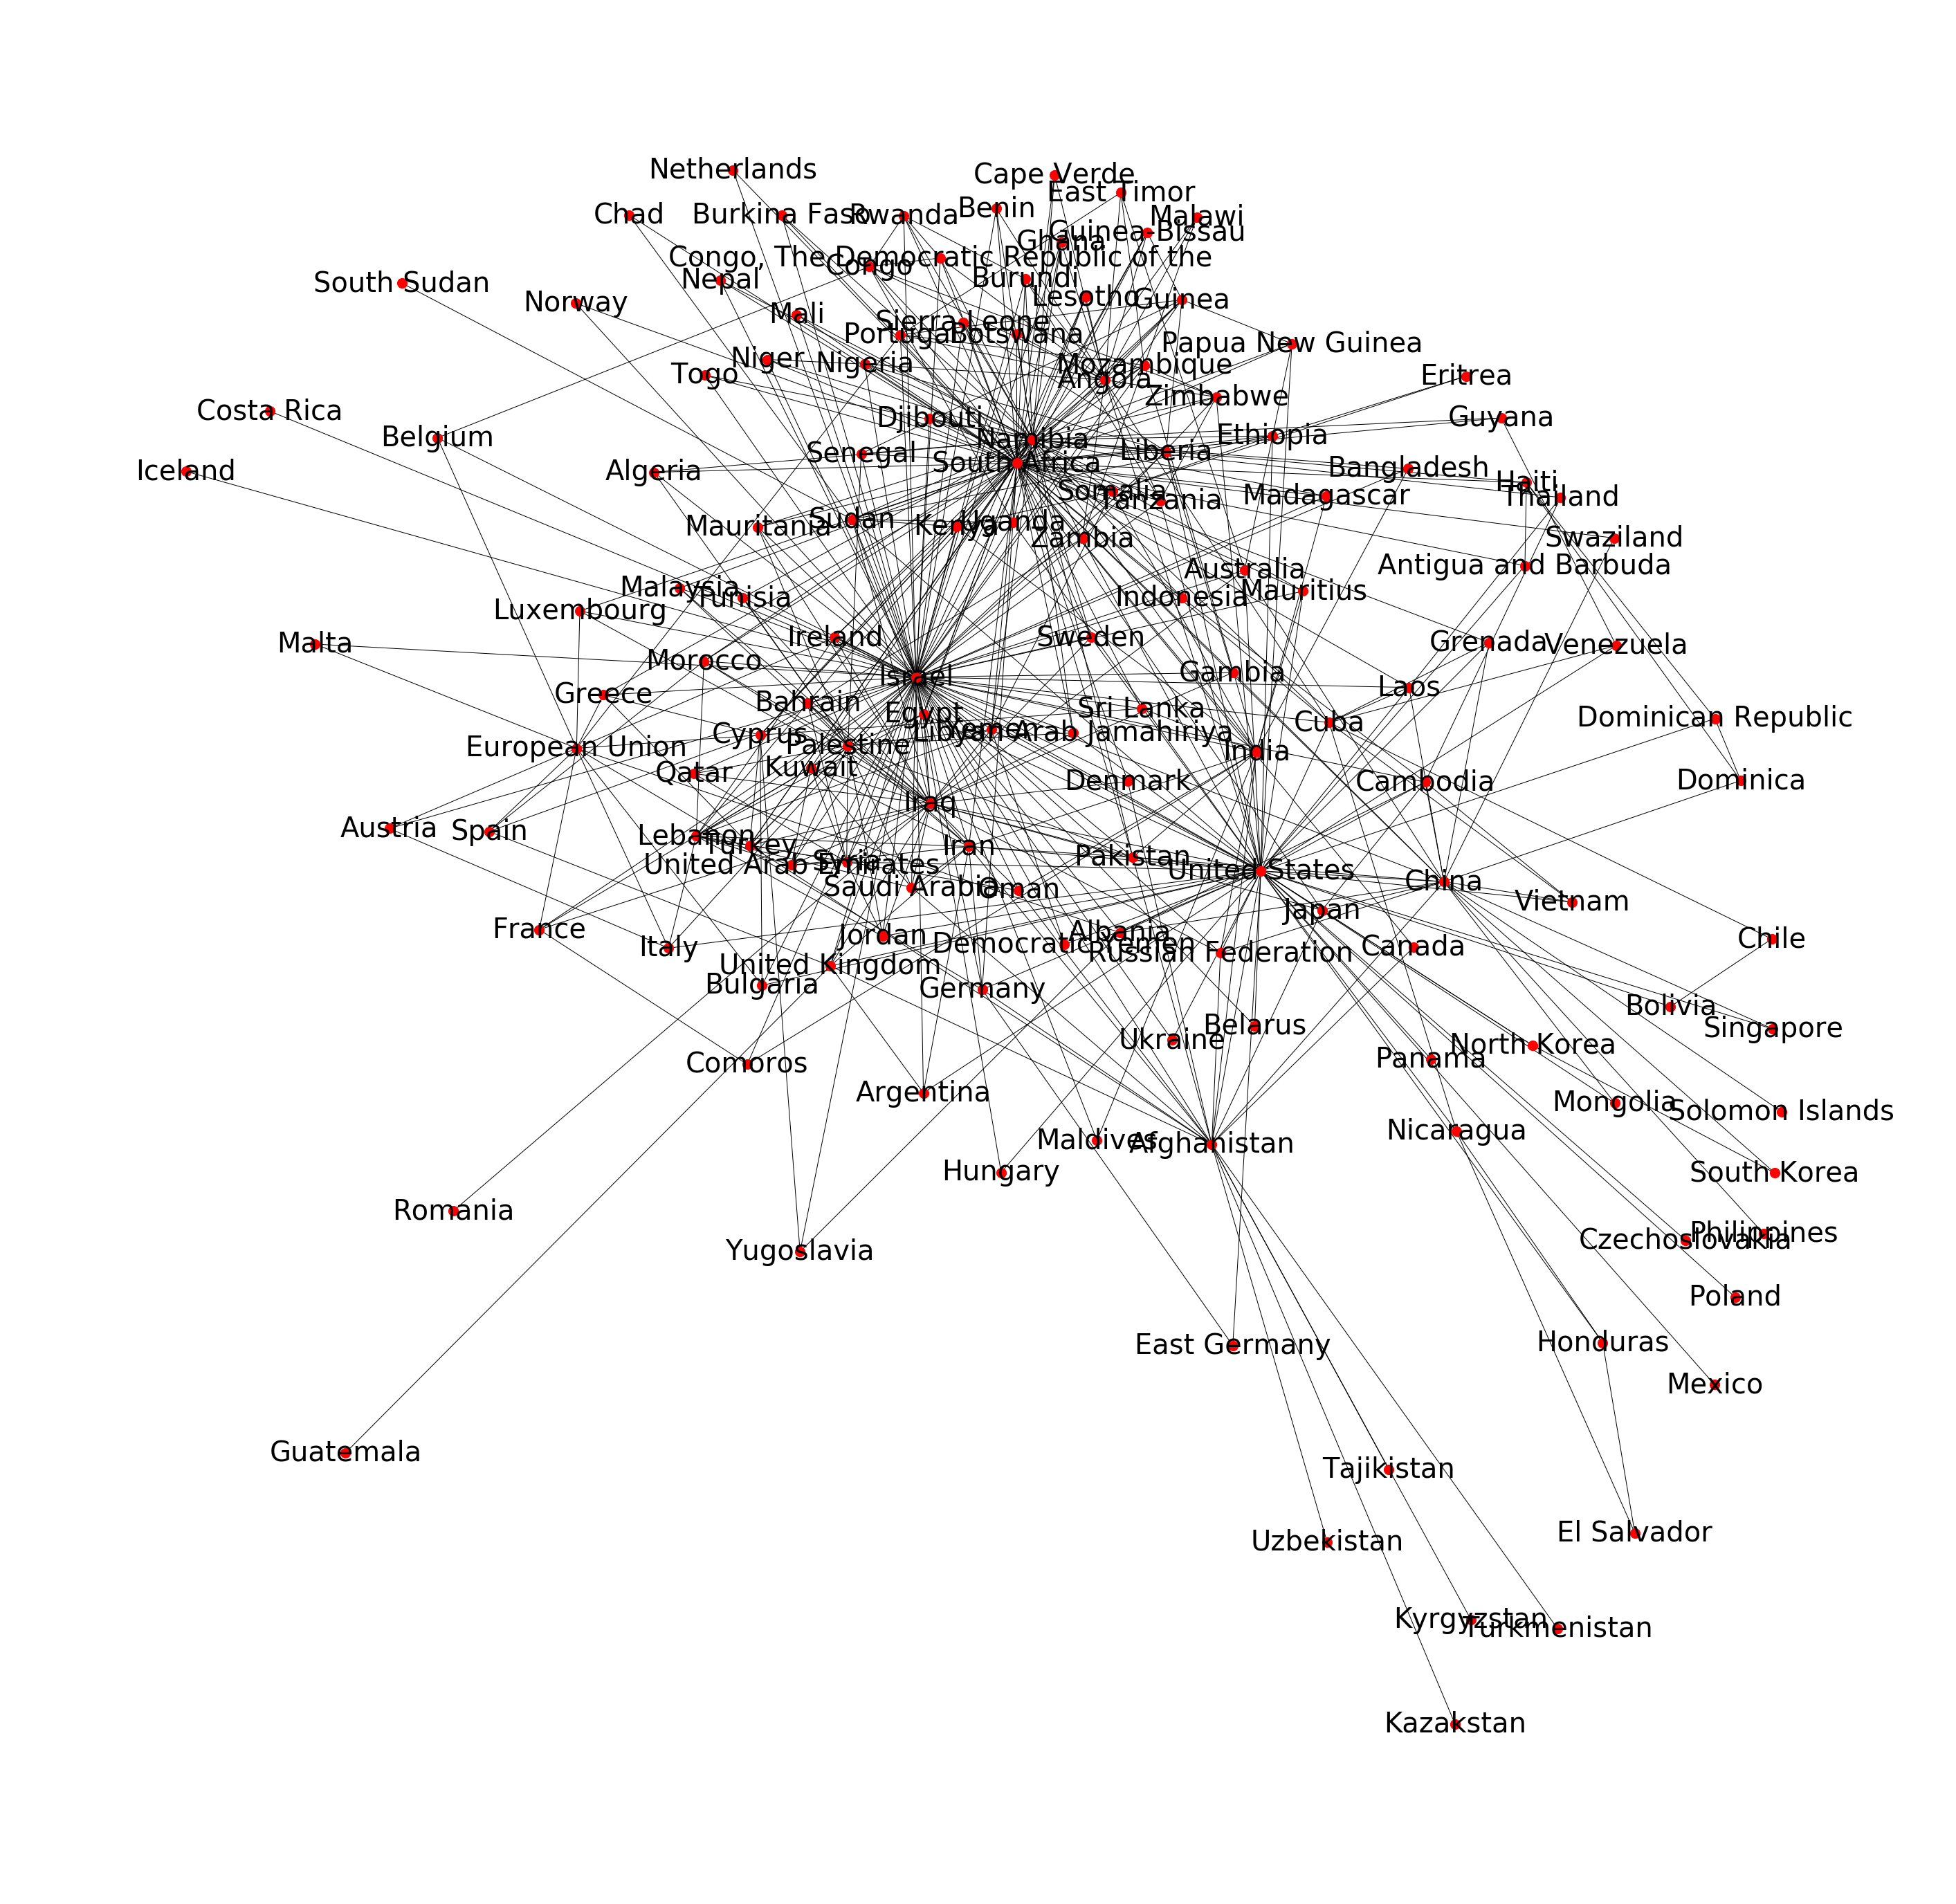

In [16]:
gfig, gax = plt.subplots(figsize = (50,50))
hego = nx.ego_graph(g,'United States', radius =2)
pos = nx.spring_layout(g, k=.3, iterations=2000, scale =10)
nx.draw(hego, pos, ax=gax, node_size=200, with_labels=True, font_size=40)